(template_notebook)=
# Leave One Group Out (LOGO) in PyMC

:::{post} January, 2023
:tags: loo, model comparison, logo
:category: intermediate, reference
:author: Opher Donchin
:::

This notebook uses the dinosaur dataset used by Richard McElreath in *Statistical Rethinking* to demonstrate "leave one group out" model comparison. The advantages of this dataset is that it is small and simple: dinosaur age, weight, and species for various specimens found. Since the dinosaurs are grouped by species, there is an obvious interest in predicting how age and mass might vary in species that have no yet been studies as well as predicting making estimates of how age and mass are related in the species currently unders study.

In [5]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import seaborn as sns

In [2]:
%config InlineBackend.figure_format = 'retina'  # high resolution figures
az.style.use("arviz-darkgrid")
rng = np.random.default_rng(42)

## Load the dinosaur data

In [3]:
try:
    d = pd.read_csv(os.path.join("..", "data", "Dinosaurs.csv"), sep=';')
except FileNotFoundError:
    d = pd.read_csv(pm.get_data("Dinosaurs.csv"), sep=';')

d.head()

,age,mass,species,sp_id
0,1,162.7,Maiasaura peeblesorum,2
1,5,423.1,Maiasaura peeblesorum,2
2,6,1429.0,Maiasaura peeblesorum,2
3,1,0.5,Shuvuuia deserti,5
4,2,0.6,Shuvuuia deserti,5


c:\miniconda3\envs\pymc-dev\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  self._figure.tight_layout(*args, **kwargs)


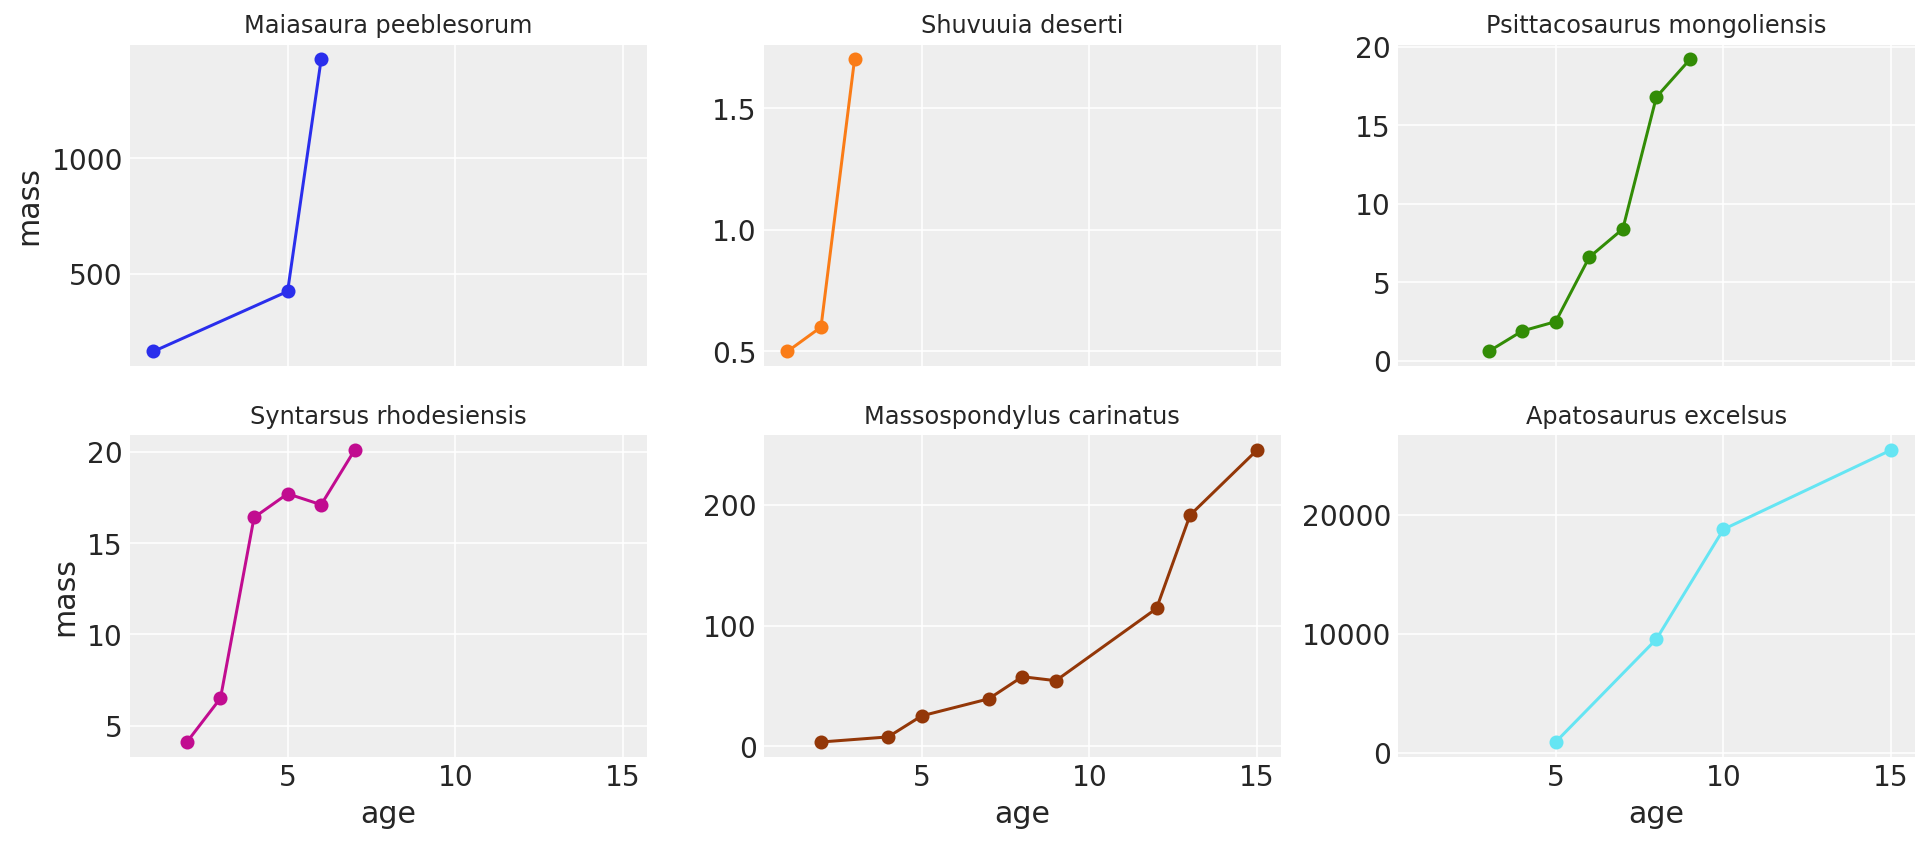

In [6]:
grid = sns.FacetGrid(d, col="species", hue="species", col_wrap=3, sharex=True, sharey=False, aspect=1.5)
grid.map(plt.plot, "age", "mass", marker="o")
grid.set_titles(col_template="{col_name}", size=12)

## Authors
- Authored by [Benjamin T. Vincent](https://github.com/drbenvincent) in January 2023 

## References
:::{bibliography}
:filter: docname in docnames
:::

## Watermark

In [4]:
%load_ext watermark
%watermark -n -u -v -iv -w -p pytensor

Last updated: Wed Dec 28 2022

Python implementation: CPython
Python version       : 3.11.0
IPython version      : 8.7.0

pytensor: 2.8.11

pymc      : 5.0.1
numpy     : 1.24.0
arviz     : 0.14.0
pandas    : 1.5.2
sys       : 3.11.0 | packaged by conda-forge | (main, Oct 25 2022, 06:21:25) [Clang 14.0.4 ]
matplotlib: 3.6.2

Watermark: 2.3.1



:::{include} ../page_footer.md
:::